In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

In [2]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target # Training labels ('malignant = 0', 'benign = 1')
X = cancer_data.data # 30 attributes
X = preprocessing.scale(X)

C:\Users\indra\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


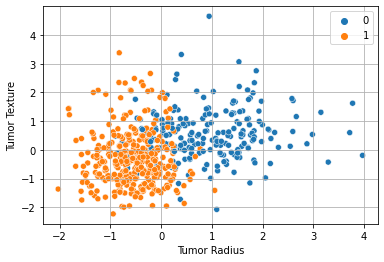

In [3]:
# Plotting first two attributes of training points

sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.xlabel("Tumor Radius")
plt.ylabel("Tumor Texture")
plt.grid(True)
plt.show()

In [5]:
alpha = np.arange(1e-15, 1, 0.005) # Range of hyper-parameter values 1e-15 to 1 by 0.005
val_scores = np.zeros((len(alpha), 1)) # Initialize validation score for each alpha value

for i in range(len(alpha)): #for each alpha value
    # Set up SVM with hinge loss and l2 norm regularization
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    # Calculate the cross-validation scores for 5-fold cross-validation
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean() # Calculate mean of the 5 scores

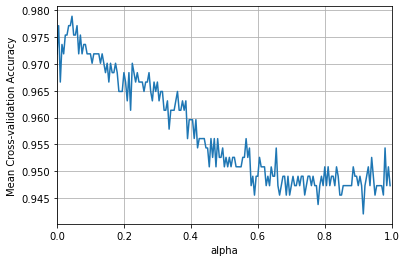

In [6]:
# Plot of how cross-validation scores changes with alpha
plt.plot(alpha, val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-validation Accuracy')
plt.grid(True)
plt.show()

alpha star =  0.045000000000001


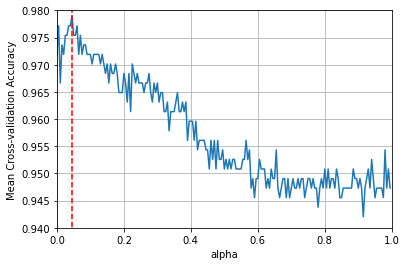

In [9]:
# Determine the alpha that maximizes the cross-validation score
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha star = ', alpha_star)

plt.plot(alpha, val_scores)
plt.plot(np.ones(11)*alpha_star, np.arange(0, 1.1, 0.1), '--r')
plt.xlim(0,1)
plt.ylim(0.94, 0.98)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-validation Accuracy')
plt.grid(True)
plt.show()

In [10]:
# Train model with alpha_star
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star)
model_trained = model_star.fit(X, y)
print("Training Accuracy = ", model_trained.score(X, y))

Training Accuracy =  0.9806678383128296


C:\Users\indra\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


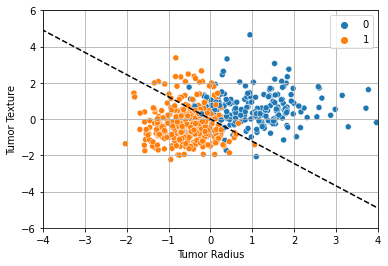

In [12]:
# Plot decision boundary of trained model
slope = model_trained.coef_[0, 1]/-model_trained.coef_[0, 0]
x1 = np.arange(-10, 10, 0.5)
y1 = slope*x1
sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.plot(x1, y1, '--k')
plt.xlim(-4, 4)
plt.ylim(-6, 6)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()